# Forecasting with a Neuralprophet 📉

One of famous model for time series is `prophet` from Facebook. This uses a model which is similar to a **generalised additive model** (GAM), a class of additive (linear) models with potentially non-linear components.

There is the paper available here for the most curious: [click here](https://peerj.com/preprints/3190/)

The model is easily interpreted (as a sum of components) and simple to fit (parameters have a strightforward interpretation).
But if the hypothesis of the parametric model are not respected, the fitted model may seriously underfit.

In this notebook, we won't use `prophet` but its little brother: `neuralprophet`. The project was build as an extension of the `prophet` one. It is now the project that is mainly maintained. To get documentation about `neuralprophet`, [click here](https://neuralprophet.com/).  

Todo:
1. Look at this video to discover `prophet`: [click here](https://youtu.be/pOYAXv15r3A)  
1. Now `prophet` is dead. Read what is `neuralprophet` regarding `prophet`: [click here](https://raw.githubusercontent.com/ourownstory/neural_prophet/61f1c6d4667db19a189e15037eb230ee5e90b80c/notes/NeuralProphet_Introduction.pdf)
1. look at the documentation to install `neuralprophet`

For the most curious and if you have time, see the paper of `neuralprophet`: [click here](https://arxiv.org/abs/2001.04063)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

import seaborn as sns 
import matplotlib.style as style

## Application on airline data

We setup the data as we had done so before in the ARIMA example. The purpose is to understand how to interpret the model and see if it provides better performances.

In [2]:
from pmdarima.datasets import load_airpassengers

START_DATE = '1949-01-01'
airline = load_airpassengers(as_series=True)

#there's no datetimeindex from the bundled dataset. So let's add one.
airline.index= pd.date_range(START_DATE, 
                             periods=len(airline), 
                             freq='MS')

### Create train and test set

In [3]:
# your code here
train, test = airline[:int(0.8*len(airline))], airline[int(0.8*len(airline)):]

In [5]:
airline.shape, train.shape, test.shape

((144,), (115,), (29,))

In [15]:
train = pd.DataFrame(train)
train.reset_index(inplace=True)

In [21]:
train.columns = ['ds','y']

In [31]:
train.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [32]:
test = pd.DataFrame(test)
test.reset_index(inplace=True)
test.columns = ['ds', 'y']

In [7]:
from neuralprophet import NeuralProphet
import plotly

In [105]:
model = NeuralProphet()
model.fit(train, freq='ME')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - ME
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 230


Training: |                                               | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (8) is too small than the required number                     for the learning rate finder (208). The results might not be optimal.


Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,1.623878,0.0,681.811829,703.663757,1.603187,0.0,0
1,1.531153,0.0,664.909424,689.170288,1.564169,0.0,1
2,1.440770,0.0,627.235962,652.528992,1.465817,0.0,2
3,1.348691,0.0,568.336426,591.091003,1.301070,0.0,3
4,1.251055,0.0,549.088135,573.330750,1.244642,0.0,4
...,...,...,...,...,...,...,...
225,0.003633,0.0,13.888524,17.332270,0.004006,0.0,225
226,0.003629,0.0,12.122846,15.684388,0.003429,0.0,226
227,0.003625,0.0,11.662558,15.174401,0.003283,0.0,227
228,0.003630,0.0,11.711317,15.210094,0.003291,0.0,228


In [106]:
future = model.make_future_dataframe(train, periods=len(test))

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - ME
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [107]:
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [96.552]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - ME
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [96.552]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - ME


Predicting: |                                             | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [108]:
print(forecast.tail())

           ds     y       yhat1       trend  season_yearly
24 1960-07-31  None  514.502075  460.505035      53.997040
25 1960-08-31  None  481.377167  463.244263      18.132923
26 1960-09-30  None  444.732849  465.895081     -21.162262
27 1960-10-31  None  419.481934  468.634308     -49.152355
28 1960-11-30  None  440.928070  471.285156     -30.357069


In [109]:
forecast['y'] = test['y']

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


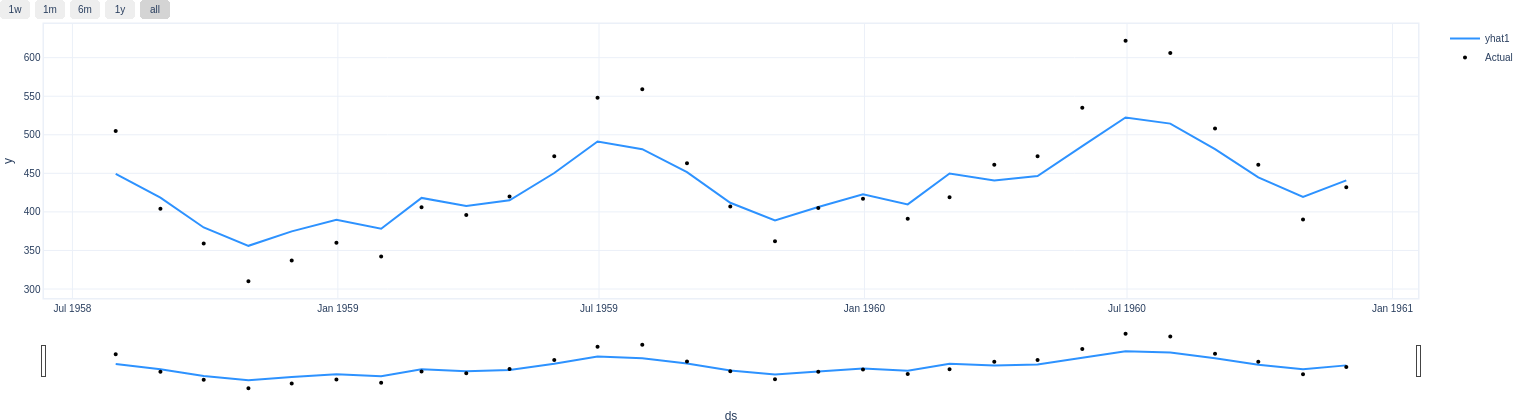

In [110]:
model.plot(forecast)

In [111]:
mae = mean_absolute_error(forecast.y, forecast.yhat1)
mse = mean_squared_error(forecast.y, forecast.yhat1)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((forecast.y - forecast.yhat1) / forecast.y)) * 100

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

Mean Absolute Error (MAE): 30.785
Mean Squared Error (MSE): 1566.684
Root Mean Squared Error (RMSE): 39.581
Mean Absolute Percentage Error (MAPE): 6.714%


In [69]:
import warnings
warnings.filterwarnings("ignore")

In [141]:
from sklearn.model_selection import ParameterGrid

def evaluate_model(params, df):
    model = NeuralProphet(
        n_lags=params['n_lags'],
        n_changepoints=params['n_changepoints'],
        learning_rate=params['learning_rate'],
        changepoints_range=params['changepoints_range'],
        trend_reg=params['trend_reg'],
        seasonality_reg=params['seasonality_reg'],
        accelerator='gpu'
    )
    # print(f"Model is running on: {model.device}")
    metrics = model.fit(df, freq='M')
    future = model.make_future_dataframe(df, periods=12)
    forecast = model.predict(future)
    
    return metrics['RMSE'].values[-1]

##### 
{'changepoints_range': 0.2, 'learning_rate': 0.1, 'n_changepoints': 5, 'n_lags': 12, 'seasonality_reg': 0.5, 'trend_reg': 0}

In [130]:
import torch

print(torch.cuda.is_available())

True


In [131]:
print(f"Model is running on: {model.model.device}")

Model is running on: cpu


In [208]:
param_grid = {
    'n_lags': [0],
    'n_changepoints': [50,100,200],
    'learning_rate': [0.08],
    'changepoints_range': [1],
    'trend_reg': [0],
    'seasonality_reg': [0.7]
}

grid = ParameterGrid(param_grid)

best_params = None
best_score = float('inf')

# Loop over the parameter grid
for params in grid:
    print(f"Evaluating parameters: {params}")
    
    # Train and evaluate the model with the current set of parameters
    score = evaluate_model(params, train)
    
    # Check if this is the best score so far
    if score < best_score:
        best_score = score
        best_params = params

print(f"Best parameters: {best_params}")
print(f"Best score (RMSE): {best_score}")

INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 230
INFO - (NP.utils.configure_trainer) - Using accelerator gpu with -1 de

Evaluating parameters: {'changepoints_range': 1, 'learning_rate': 0.08, 'n_changepoints': 50, 'n_lags': 0, 'seasonality_reg': 0.7, 'trend_reg': 0}


Training: |                                               | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: |                                             | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set e

Evaluating parameters: {'changepoints_range': 1, 'learning_rate': 0.08, 'n_changepoints': 100, 'n_lags': 0, 'seasonality_reg': 0.7, 'trend_reg': 0}


Training: |                                               | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: |                                             | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set e

Evaluating parameters: {'changepoints_range': 1, 'learning_rate': 0.08, 'n_changepoints': 200, 'n_lags': 0, 'seasonality_reg': 0.7, 'trend_reg': 0}


Training: |                                               | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: |                                             | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Best parameters: {'changepoints_range': 1, 'learning_rate': 0.08, 'n_changepoints': 200, 'n_lags': 0, 'seasonality_reg': 0.7, 'trend_reg': 0}
Best score (RMSE): 8.608553886413574


In [225]:
model = NeuralProphet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        n_changepoints=100,
        learning_rate=0.08,
        changepoints_range=0.5,
        seasonality_reg=0.7,
        trend_reg=0,
        accelerator='gpu'
    )

INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.


In [226]:
model.fit(train, freq='MS')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 230
INFO - (NP.utils.configure_trainer) - Using accelerator gpu with -1 device(s).


Training: |                                               | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,1.476220,0.000000,637.398315,683.424683,1.467108,0.000000,0
1,1.368796,0.000000,601.877197,654.919434,1.339853,0.000000,1
2,1.266078,0.000000,556.010376,612.087158,1.282204,0.000000,2
3,1.161142,0.000000,516.271118,567.060242,1.138881,0.000000,3
4,1.051803,0.000000,493.277069,548.947632,1.130491,0.000000,4
...,...,...,...,...,...,...,...
225,0.003797,0.000022,12.818326,16.090792,0.003726,0.000022,225
226,0.003791,0.000022,13.217070,16.590513,0.003852,0.000022,226
227,0.003788,0.000022,14.258497,17.506510,0.004440,0.000022,227
228,0.003798,0.000022,13.171779,17.045408,0.004214,0.000022,228


In [227]:
future = model.make_future_dataframe(train, periods=len(test))
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.13]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.552]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.552]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: |                                             | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [228]:
forecast

,ds,y,yhat1,trend,season_yearly
0,1958-08-01,None,457.072784,403.410278,53.662529
1,1958-09-01,None,426.340424,406.630280,19.710161
2,1958-10-01,None,388.797882,409.746460,-20.948578
3,1958-11-01,None,361.917206,412.966522,-51.049316
4,1958-12-01,None,387.221100,416.082733,-28.861637
5,1959-01-01,None,396.006439,419.302734,-23.296307
6,1959-02-01,None,390.802063,422.522827,-31.720751
7,1959-03-01,None,427.452209,425.431244,2.020978
8,1959-04-01,None,419.248749,428.651306,-9.402588
9,1959-05-01,None,425.763916,431.767487,-6.003594


In [229]:
# forecast['yhat1'] = forecast['y']
forecast['y'] = test['y']

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


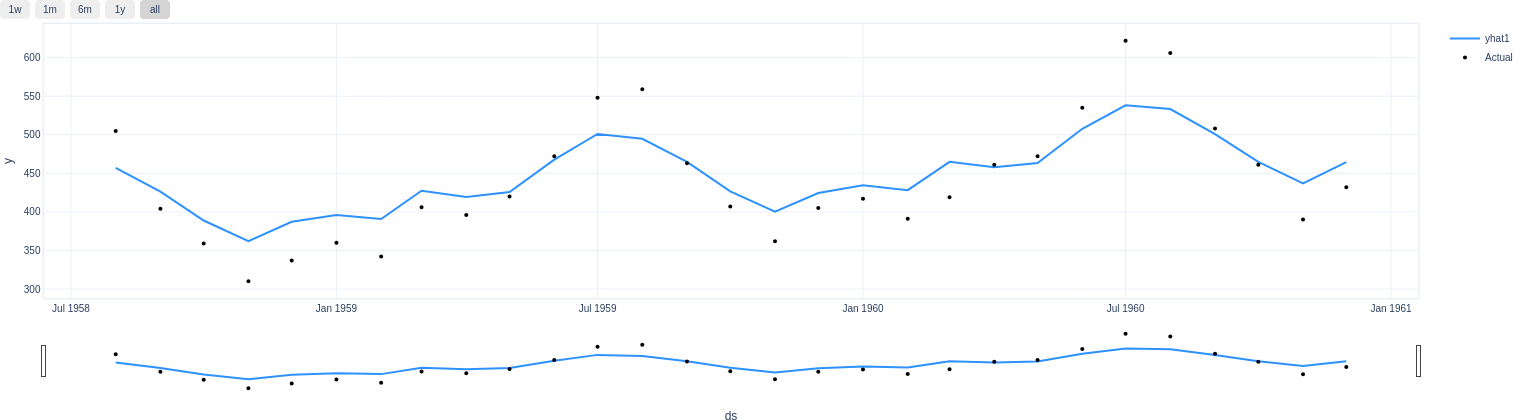

In [230]:
model.plot(forecast)

In [100]:
from  sklearn.metrics import mean_absolute_error, mean_squared_error

In [231]:
forecast.dropna(subset='yhat1',inplace=True)

In [232]:
mae = mean_absolute_error(forecast.y, forecast.yhat1)
mse = mean_squared_error(forecast.y, forecast.yhat1)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((forecast.y - forecast.yhat1) / forecast.y)) * 100

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

Mean Absolute Error (MAE): 31.676
Mean Squared Error (MSE): 1463.051
Root Mean Squared Error (RMSE): 38.250
Mean Absolute Percentage Error (MAPE): 7.340%


In [ ]:
{'changepoints_range': 0.2, 'learning_rate': 0.1, 'n_changepoints': 5, 'n_lags': 12, 'seasonality_reg': 0.5, 'trend_reg': 0}

## Build and train your model

Look at the documentation of `neuralprophet` and try to build and train your first model.
1. Look at the tutorial to understand all the parameters of `neuralprophet`: [click here](https://neuralprophet.com/tutorials/index.html)  
You could look at the examples to get ideas too: [click here](https://neuralprophet.com/how-to-guides/index.html#application-examples)  
**Warning**: pay attention to the format of the data, as well as how to create the prediction variable.
2. build your model. Your model must:
    - take into account uncertainty and provide one confidence interval of 90%.
    - be adapted to the time series.
3. Justify all the selected parameters and their values: `seasonality_mode`, `n_lags`, etc....
3. train your model by plotting the training curve.

### Evaluate your model

1. Select the metrics to evaluate your model.
2. Evaluate and compare the results with ARIMA and SARIMA.

In [14]:
# your code here

`your observation and conclusion here`

## Cross validation in prophet

There are cross validation utils in `neuralprophet` that take care of time series data and can perform adjustable rolling windows as we had previously seen in other time series cross validation functions.

1. look at the documentation and example on cross-validation: [click here](https://neuralprophet.com/how-to-guides/feature-guides/test_and_crossvalidate.html?highlight=cross)
2. apply the cross validation. Justify the parameters of the cross-validation.

In [ ]:
# your code here

`your observations and conclusion`

# Optional energy data forecasting ⚡

Forecasting energy demand is big business and very important in helping energy producers maintain the balance within the electrical grid. You can find forecasts of energy demands for France in realtime [here](https://www.rte-france.com/fr/eco2mix/eco2mix-consommation). The data was already downloaded in the `data/nats.csv` file.

Your mission now is to imagine a useful use-case for an enterprise and use `Prophet` to make forecasts on the energy data you have already seen (in data viz module) for France! Feel free to choose :
* the type of energy generation/consommation
* france or regional,
* frequency scale you wish to try!

Try and consider a forecast horizon that seems useful for the frequency at which you are making your predictions e.g. predicting the hourly forecast for 12 months propbably cannot be used in any meaningful way - and is probably not going be very easy to forecast accurately.

Consider that:
* Reducing the scale of the data, i.e. to regional
* Higher frequency predictions
* longer periods of forecast

...are likely to make it more difficult to make a good forecast.

Consider also that you must pick the most suitable cross validation procedure for your problem. Consider the initial, step and horizon you will use carefully.

Once you have made your model:
1. Compare it to a naive model!! If it does not beat this then try reducing your forecast horizon to find at what scale you can make useful predictions.
2. Try tuning the model in some way to improve performance (add holidays might be a good idea)
3. If you have time compare your model to an ARIMA model. Why might there be differences in perfomance between the two approachecs to forecasting?

(feel free to use a new notebook for this task!)